<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [35]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt
from numpy import random

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [36]:
jpegLocation = r"/Users/tiger/Downloads/lemon.jpeg"
img = Image.open(jpegLocation)
image = np.array(img)

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of image:  (100, 100, 3)
Shape of img_single_channel:  (100, 100)


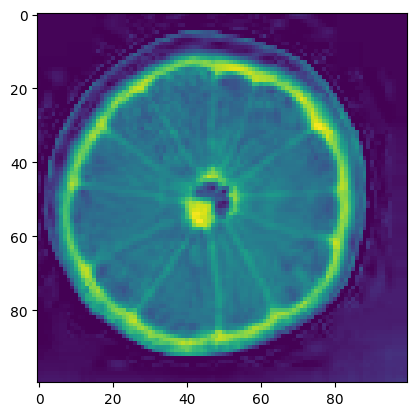

In [37]:
# 1
print("Shape of image: ", image.shape)

# 2
# Find total number of bands, use index of last band to retrive last channel
totalBands = img.getbands()
lastBand = totalBands[-1]
lastChannel = img.getchannel(lastBand)

img_single_channel = np.array(lastChannel)

# 3
print("Shape of img_single_channel: ", img_single_channel.shape)

# 4
plt.imshow(img_single_channel)
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of img_average_channel:  (100, 100)


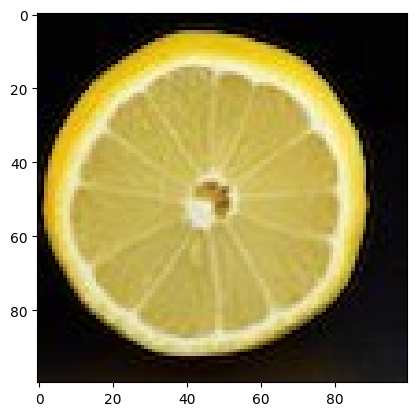

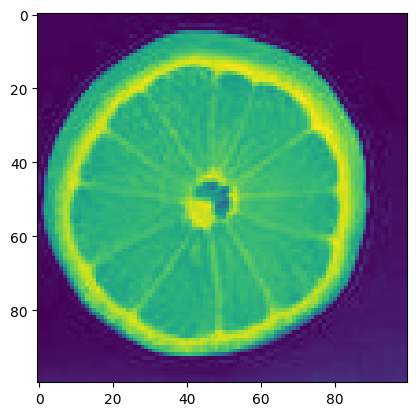

'\nThe image produced in part 1 reflects only a single channel of color (blue), while this one reflects the\naverage of all three (red, green, and blue). Because all three channels are taken into consideration, the\nresulting image is significantly closer to the original in color.\n'

In [38]:
# 1
img_average_channel = np.mean(image, 2)

# 2
print("Shape of img_average_channel: ", img_average_channel.shape)

# 3
plt.imshow(image)
plt.show()

plt.imshow(img_average_channel)
plt.show()

"""
The image produced in part 1 reflects only a single channel of color (blue), while this one reflects the
average of all three (red, green, and blue). Because all three channels are taken into consideration, the
resulting image is significantly closer to the original in color.
"""

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [39]:
# 1
"""
An identity matrix is a square matrix consisting of 1s that span across its main diagonal and 0s elsewhere.
Multiplying with an identity matrix will result in the same matrix.
"""

# 2
identity_matrix = np.identity(img_average_channel.shape[0])

# 3
n = random.randint(img_average_channel.shape[0])
randomRow = identity_matrix[n]

print("Random row: ", '\n', randomRow)

"""
The index of the 1 within this row is equal to the value of the random integer generated.
"""

Random row:  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


'\nThe index of the 1 within this row is equal to the value of the random integer generated.\n'

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [40]:
# 1
N = image.shape[0]
rows = np.arange(0, N)

# 2
random.shuffle(rows)

# 3
print(rows)

[51 55 15 14 58  0 72 64 84 61 92 45 22 97 90 28 11 70 12 85 18 63 31  6
 87 13 76 17 71 46 47 59 49 66 36 27 37  1 50 54 79  8 19 40 33 68  5 21
 77 16 23 41 34 20 99  3 62 73 53  7 29 93 57 94 25 35  2 32 38 81 39 43
 30 88 56 89 83 10 78 91 82 98 48 65  4 75 44 74 24 86 80 52 26  9 60 67
 69 42 95 96]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [41]:
# 1
T = np.array(identity_matrix[rows])

# 2
"""
T is a permutation matrix. It is essentially the identity matrix with randomly rearranged rows.
"""

# 3
print("Shape of T: ", T.shape)

Shape of T:  (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image:  (100, 100)


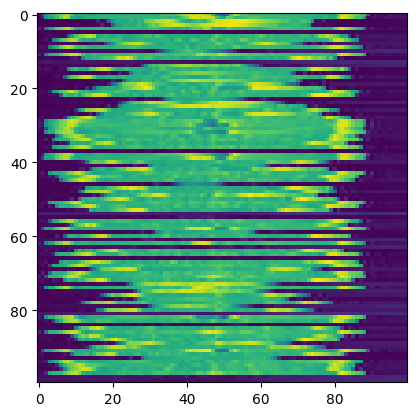

'\nThe colors of the new image are identical to that of the original. However, the order in which its rows are plotted has changed.\nThis is because the original image has essentially been multiplied by a shuffled identity matrix. As mentioned in part 3,\nmultiplying by the identity matrix will produce an unchanged matrix. But because the indices of the identity matrix have been\nrearranged, so have the rows of the image.\n'

In [42]:
# 1
transformed_image = np.matmul(T, img_average_channel)
print("Shape of transformed_image: ", transformed_image.shape)

# 2
plt.imshow(transformed_image)
plt.show()

"""
The image appears to be scrambled horizontally.
"""

# 3
"""
The colors of the new image are identical to that of the original. However, the order in which its rows are plotted has changed.
This is because the original image has essentially been multiplied by a shuffled identity matrix. As mentioned in part 3,
multiplying by the identity matrix will produce an unchanged matrix. But because the indices of the identity matrix have been
rearranged, so have the rows of the image.
"""

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Determinant of T:  1.0


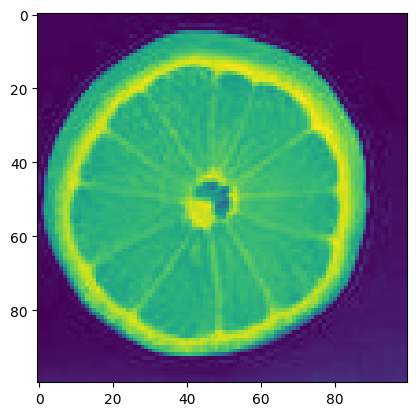

In [43]:
# 1
"""
T is invertible because its determinant is not equal to zero.
"""
print("Determinant of T: ", det(T))

# 2
Tinv = inv(T)

# 3
# Revert changes by multiplying inverse T matrix with transformed image
originalImage = np.matmul(Tinv, transformed_image)
plt.imshow(originalImage)
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


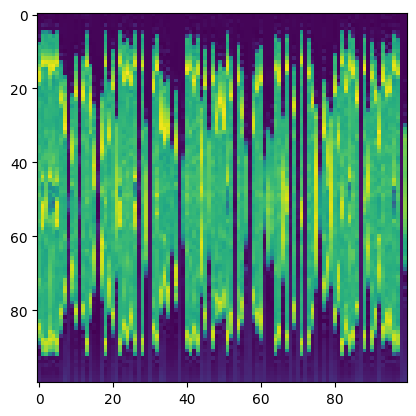

In [44]:
# Generate array of random column indices
numberOfColumns = image.shape[1]
columns = np.arange(0, numberOfColumns)
random.shuffle(columns)

# Shuffle columns of identity matrix
T_columns = identity_matrix[columns]
transformedImageColumns = np.matmul(img_average_channel, T_columns)

plt.imshow(transformedImageColumns)
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

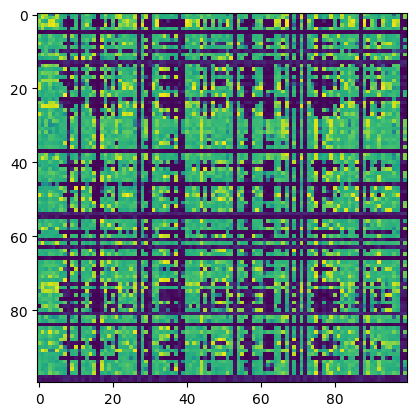

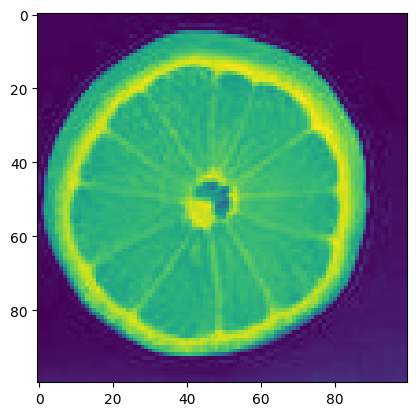

In [45]:
# Scramble image 
transformedRows = np.matmul(T, img_average_channel)
transformedRowsColumns = np.matmul(transformedRows, T_columns)

plt.imshow(transformedRowsColumns)
plt.show()

# Find inverse of both T matrices
T_rows_inverse = inv(T)
T_columns_inverse = inv(T_columns)

# Multiply by inverse T matrices to revert transformations
revertColumns = np.matmul(transformedRowsColumns, T_columns_inverse)
revertRowsColumns = np.matmul(T_rows_inverse, revertColumns)

plt.imshow(revertRowsColumns)
plt.show()